# 2022 Day 10

https://adventofcode.com/2022/day/10

https://adventofcode.com/2022/day/10/input

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
inp = open('input-10.txt').read()

In [3]:
test_inp = """
noop
addx 3
addx -5
""".strip()
test_inp

'noop\naddx 3\naddx -5'

In [4]:
test_inp2 = """
addx 15
addx -11
addx 6
addx -3
addx 5
addx -1
addx -8
addx 13
addx 4
noop
addx -1
addx 5
addx -1
addx 5
addx -1
addx 5
addx -1
addx 5
addx -1
addx -35
addx 1
addx 24
addx -19
addx 1
addx 16
addx -11
noop
noop
addx 21
addx -15
noop
noop
addx -3
addx 9
addx 1
addx -3
addx 8
addx 1
addx 5
noop
noop
noop
noop
noop
addx -36
noop
addx 1
addx 7
noop
noop
noop
addx 2
addx 6
noop
noop
noop
noop
noop
addx 1
noop
noop
addx 7
addx 1
noop
addx -13
addx 13
addx 7
noop
addx 1
addx -33
noop
noop
noop
addx 2
noop
noop
noop
addx 8
noop
addx -1
addx 2
addx 1
noop
addx 17
addx -9
addx 1
addx 1
addx -3
addx 11
noop
noop
addx 1
noop
addx 1
noop
noop
addx -13
addx -19
addx 1
addx 3
addx 26
addx -30
addx 12
addx -1
addx 3
addx 1
noop
noop
noop
addx -9
addx 18
addx 1
addx 2
noop
noop
addx 9
noop
noop
noop
addx -1
addx 2
addx -37
addx 1
addx 3
noop
addx 15
addx -21
addx 22
addx -6
addx 1
noop
addx 2
addx 1
noop
addx -10
noop
noop
addx 20
addx 1
addx 2
addx 2
addx -6
addx -11
noop
noop
noop
""".strip()

## Part 1

In [5]:
class Program:
    def __init__(self, inp, x0=1):
        self.inp = inp
        self.lines = inp.split('\n')
        
        self.x = x0
        self.xs = [self.x]
        
        self.n_lines = len(self.lines)
        self.i_line = 0
        
    def step(self):
        if self.i_line == self.n_lines:
            raise RuntimeError(f'cannot step past i_line = {self.i_line}')
        line = self.lines[self.i_line]
        if line == 'noop':
            self.xs += [self.x]
        elif match := re.match(r'addx (.*)$', line):
            value = int(match.group(1))
            self.xs += 2 * [self.x]
            self.x += value
        else:
            raise RuntimeError(f'cannot parse line "{line}"')
        self.i_line += 1
            
    def run(self):
        for i in range(self.i_line, self.n_lines):
            self.step()
        self.xs += [self.x]
        self.xs = np.array(self.xs)
        return self

    def interesting(self, start=20, end=220, step=40):
        rang = np.arange(len(self.xs))
        return (rang * self.xs)[start:end+1:step]
    
    def render(self, nx=40, ny=6):
        clock = np.arange(1, ny*nx + 1).reshape((ny,nx))
        horiz = np.tile(np.arange(nx), ny).reshape((ny,nx))
        X = self.xs[clock]
        return 1 * (horiz - 1 <= X) & (X <= horiz + 1)

In [6]:
p = Program(test_inp)
p.run()
p.x

-1

In [7]:
p.xs

array([ 1,  1,  1,  1,  4,  4, -1])

In [8]:
p = Program(test_inp2)
p.run()
p.x

17

In [9]:
p.interesting()

array([ 420, 1140, 1800, 2940, 2880, 3960])

In [10]:
p.interesting().sum()

13140

In [11]:
p = Program(inp)
p.run()
p.interesting().sum()

15360

## Part 2

In [12]:
p = Program(test_inp2)
p.run()
p.x

17

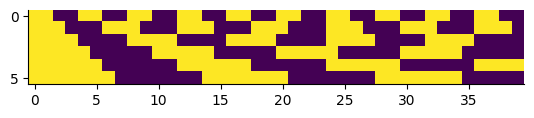

In [13]:
plt.imshow(p.render())

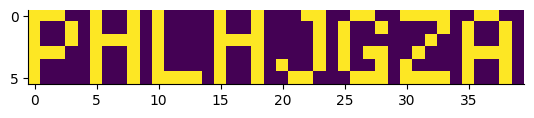

In [14]:
plt.imshow(Program(inp).run().render())